### Business Value Statement:
By predicting hourly energy output, the power plant can improve operational efficiency, optimize fuel use, and plan maintenance schedules based on expected production. This leads to reduced downtime, better alignment of supply with demand, and more efficient allocation of resources and staff.

### Success Metric
The ability to accurately predict hourly output and explain most of the variance in energy projection trends. 


### Step 1
Importing core packages to do the following: 1. Explore the data 2. Be prepared to clean the data. 3 Provide some visualizations. 4. Determine relationships within the data 

In [3]:
# core packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\PawPaw\OneDrive\Desktop\Coursera AI Product Manager Model Project\CCPP_data.csv")

### Confirming data and exploring it's features

In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.shape

(9568, 5)

In [9]:
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


### Basic stats

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


Before we move forward, I want to make sure there are no missing values that must be address which can effect the model's outcome. 

In [13]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Based off of this, I can determine that the dataset provided by Coursera is clean and ready to be used. 

### Step 2 Visualizing Relationships. 
Let's do some basic data visualization to see if we can identify trends or other items of interest. 

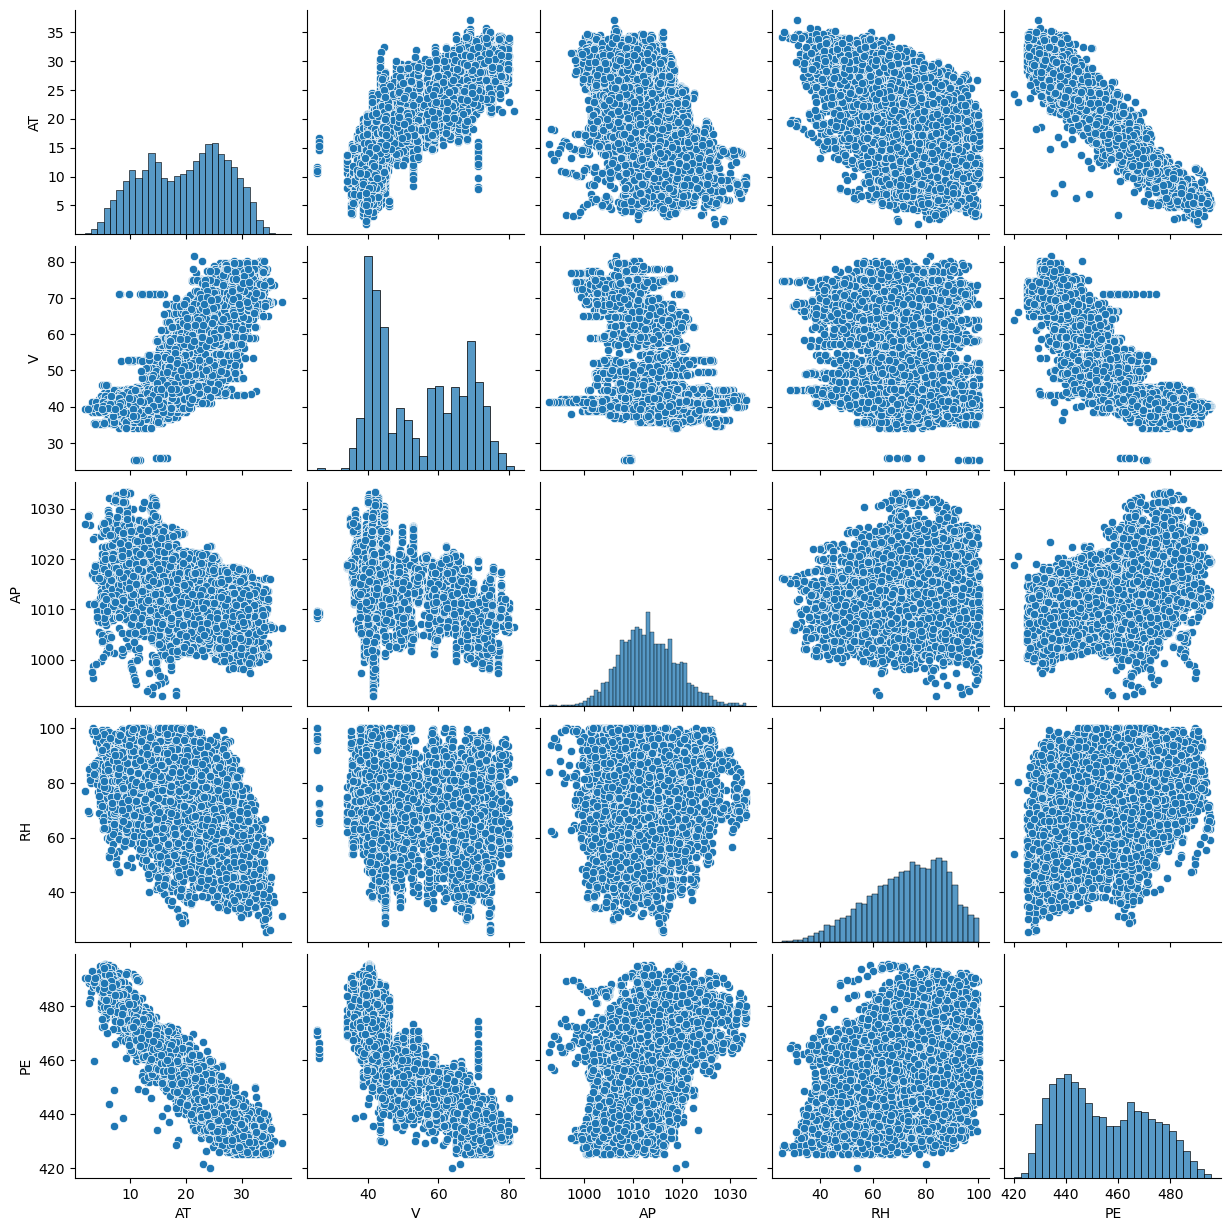

In [16]:
sns.pairplot(df)
plt.show()

Now let's create a correlation heatmap

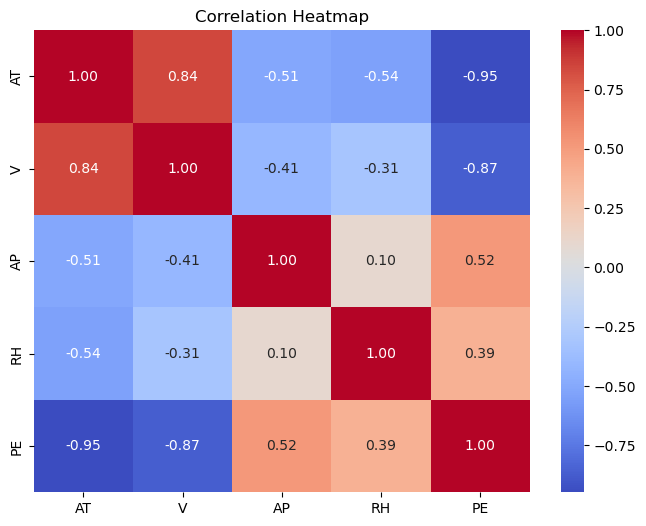

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Now I will plot indivdual relationships

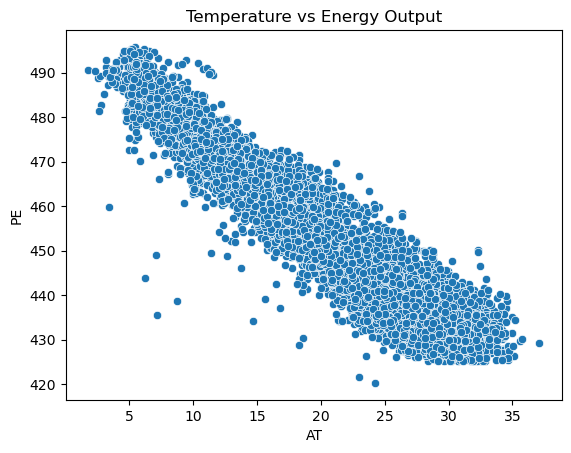

In [20]:
sns.scatterplot(data=df, x="AT", y="PE")
plt.title("Temperature vs Energy Output")
plt.show()

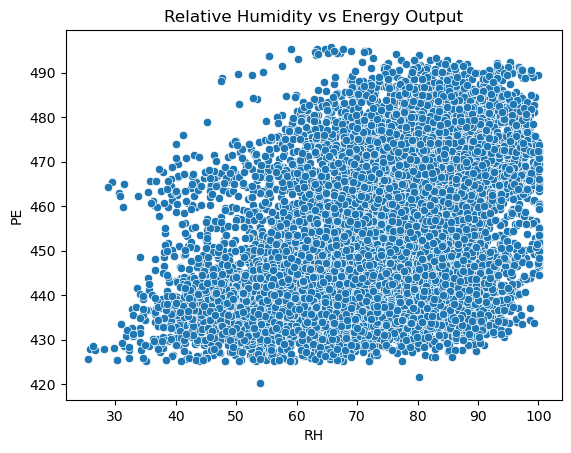

In [21]:
sns.scatterplot(data=df, x="RH", y="PE")
plt.title("Relative Humidity vs Energy Output")
plt.show()

Relative humidity provides a less direct relationship compared to temperature. So let's see about temperature and vacuum. 

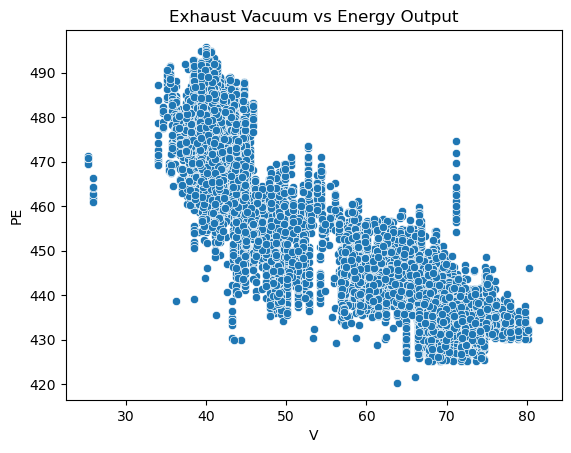

In [23]:
sns.scatterplot(data=df, x="V", y="PE")
plt.title("Exhaust Vacuum vs Energy Output")
plt.show()

### Step 3  Data Prep and Splitting
Let's define features and target

In [48]:
x = df.drop('PE', axis=1) #Features
y = df['PE'] # Target

#split training and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)

In [50]:
# checking shapes to confirm. 
x_train.shape, x_test.shape

((7654, 4), (1914, 4))

In [52]:
# So far looks good, moving on to scale the features in order they may be standarized.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Both x_trained_scaled and x_test_scaled are NumPy Arrays of Standarized values. 
Now let's test two models to see which is closer

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train baseline model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

#predict on test set
y_pred_lr = lr.predict(x_test_scaled)

#Evaluate

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE", rmse_lr)

Linear Regression RMSE 4.502633229532186


### Random Forest Regressor 

In [60]:
from sklearn.ensemble import RandomForestRegressor
#Number of trees
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 3.230977449275154


### Visualzing Performance of Models

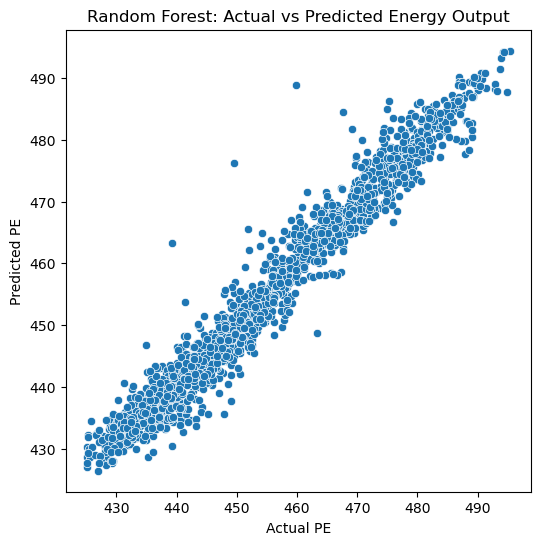

In [66]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.title("Random Forest: Actual vs Predicted Energy Output")
plt.show()

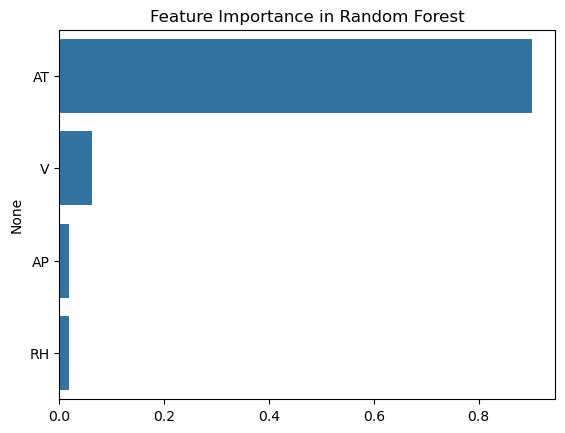

In [68]:
#Feature visulization
importances = rf.feature_importances_
feature_names = x.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.show()

### Which features are dominate?
It's clear that Teamperature dominates how energy output will occur compared to humidity and air pressure, though vacuum is the second most dominate feature, it is fair surpassed by teamperature. So it's safe to say that customer behavior which drives power consumption/demand is the most important feature to keep in mind. 

#### Let's now compare results

In [72]:
print(f'Linear Regression RMSE: {rmse_lr:.3f}')
print(f'Random Forest RMSE: {rmse_rf:.3f}')

Linear Regression RMSE: 4.503
Random Forest RMSE: 3.231


Model Performance Summary

Model	Theoretical Strengths	RMSE (MW)	Interpretation

Linear Regression: Simple baseline, assumes linear relationships	4.503	On average, predictions are off by ~4.5 MW

Random Forest Regressor	Handles nonlinear patterns, more expressive	3.231 

Strong improvement, only ~3.2 MW error